### Colors Lines and Legends Drill

For this drill, let's look at the average rainfall in Singapore over the last 5 years (2016-2020). The dataset is in this folder named: `Singapore_Monthly_Rainfall.csv`

Requirements for the chart:

- One line chart with 5 lines - 1 line for each year
  - Each line has its own color
- Y-axis is mm per month
- X-axis is each month
- Legend that links color to year

Note: You will have to do some data wrangling as currently the dataset comes with month/year combined in the same column!

Use as many cells as needed below for your chart!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
sing_df = pd.read_csv('Singapore_Monthly_Rainfall.csv')
sing_df.head()

,month,total_rainfall
0,2010-01,69.50
1,2010-02,6.30
2,2010-03,238.00
3,2010-04,158.50
4,2010-05,157.50


There are plenty of different ways to split out the dataset. (some are more efficient / less manual then the way below!)

I worked backwards by thinking of how i wanted the dataframe to be to make the chart. For this chart I want the rows to be each month and the columns to be rainfall for each year.

In [3]:
# Step 1 - split out the year and month to separate columns

sing_df['Month'] = sing_df['month'].apply(lambda x: x.split('-')[1])
sing_df['Year'] = sing_df['month'].apply(lambda x: x.split('-')[0])

In [4]:
# Step 2 - make a new column that has just that years rainfall 
# We have to reset the index or later when we try to combine the data pandas tries to match the indexes  
# This causes the dataframe to put the column values as NaNs if the indexes dont match
# (You can delete the .reset_index() and see how it works if you want to test it out)

sing_2016 = sing_df[sing_df['Year'] == '2016'].reset_index(drop=True)
sing_2016 = sing_2016.rename({'total_rainfall': 'Rainfall_2016'}, axis=1)
sing_2016

,month,Rainfall_2016,Month,Year
0,2016-01,126.60,01,2016
1,2016-02,186.00,02,2016
2,2016-03,6.20,03,2016
3,2016-04,89.80,04,2016
4,2016-05,193.80,05,2016
5,2016-06,162.80,06,2016
6,2016-07,168.60,07,2016
7,2016-08,139.20,08,2016
8,2016-09,118.90,09,2016
9,2016-10,181.00,10,2016


In [5]:
# Step 3 - apply the template from above to the other years - this will make 5 smaller dataframes one for each year

sing_2017 = sing_df[sing_df['Year'] == '2017'].reset_index(drop=True)
sing_2017 = sing_2017.rename({'total_rainfall': 'Rainfall_2017'}, axis=1)

sing_2018 = sing_df[sing_df['Year'] == '2018'].reset_index(drop=True)
sing_2018 = sing_2018.rename({'total_rainfall': 'Rainfall_2018'}, axis=1)

sing_2019 = sing_df[sing_df['Year'] == '2019'].reset_index(drop=True)
sing_2019 = sing_2019.rename({'total_rainfall': 'Rainfall_2019'}, axis=1)

sing_2020 = sing_df[sing_df['Year'] == '2020'].reset_index(drop=True)
sing_2020 = sing_2020.rename({'total_rainfall': 'Rainfall_2020'}, axis=1)

In [6]:
# Step 4 - combine all of the yearly dataset to make the final dataframe

sing_final = pd.concat([
                        sing_2016[['Month', 'Rainfall_2016']],
                        sing_2017[['Rainfall_2017']],
                        sing_2018[['Rainfall_2018']],
                        sing_2019[['Rainfall_2019']],
                        sing_2020[['Rainfall_2020']]
                       ], axis=1)

sing_final

,Month,Rainfall_2016,Rainfall_2017,Rainfall_2018,Rainfall_2019,Rainfall_2020
0,01,126.60,197.60,287.00,63.60,88.40
1,02,186.00,158.40,14.80,31.60,65.00
2,03,6.20,136.20,44.60,72.20,108.80
3,04,89.80,208.60,61.20,174.80,188.00
4,05,193.80,190.00,132.20,69.00,255.60
5,06,162.80,106.00,182.60,173.80,233.80
6,07,168.60,79.60,143.20,12.20,140.80
7,08,139.20,84.20,121.60,11.80,103.40
8,09,118.90,124.40,144.40,22.80,150.20
9,10,181.00,120.80,234.40,176.80,78.80


For the plotting - I made 5 single lines on the same chart and added in linestyle and color on a couple to demonstrate how you culd change those characteristics as need be. You could also change the location of the legend. 

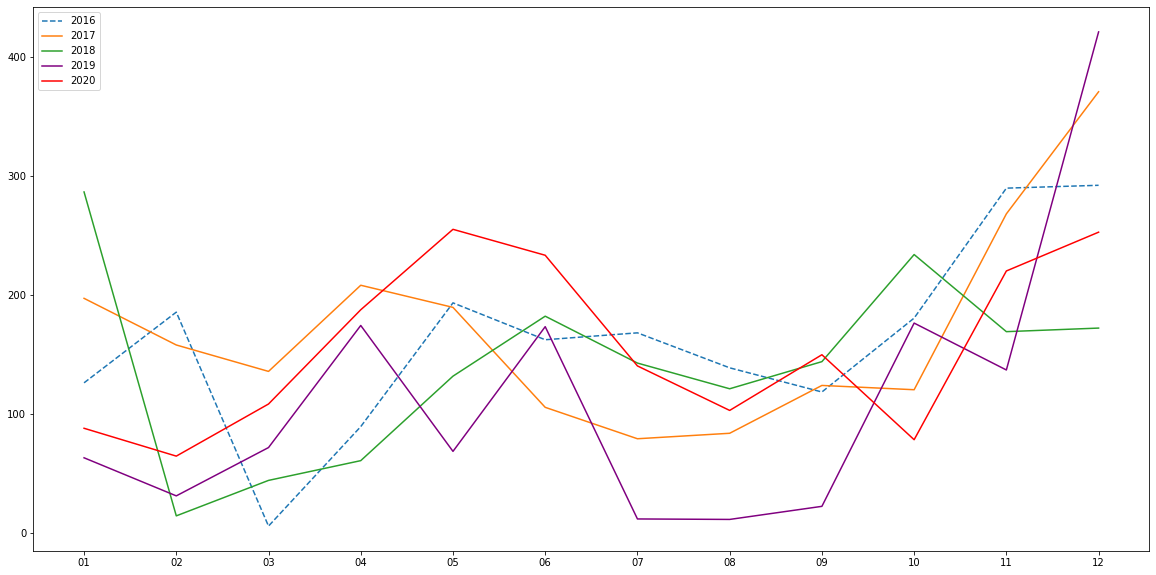

In [7]:
plt.figure(figsize=(20,10))

plt.plot(sing_final['Month'], sing_final['Rainfall_2016'], label = "2016", linestyle="--")
plt.plot(sing_final['Month'], sing_final['Rainfall_2017'], label = "2017")
plt.plot(sing_final['Month'], sing_final['Rainfall_2018'], label = "2018")
plt.plot(sing_final['Month'], sing_final['Rainfall_2019'], label = "2019", color = 'purple')
plt.plot(sing_final['Month'], sing_final['Rainfall_2020'], label = "2020", color = 'red')

plt.legend(loc = 'upper left')
plt.show()

In [8]:
# Saving the file for the next drill!

sing_final.to_csv('singapore_rainfall_cleaned.csv', index=False)